In [3]:
from Maze import Maze
from Agent import Agent
from MyQLearning import MyQLearning
from MyEGreedy import MyEGreedy
from State import State

In [19]:
def main_algo(maze: Maze, rewards, eps=0.1, alfa=0.7, gamma=0.9, max_iter=30000, max_episodes=16):
    reward_coordinates = set()
    for reward in rewards:
        maze.set_reward(maze.get_state(reward[0], reward[1]), reward[2])
        reward_coordinates.add(State(reward[0], reward[1], 1))

    # create dictions with algorithms history
    steps_per_iter = list()

    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    episode = 0
    stop = False
    steps = 0
    iterations = 0

    # keep learning until you decide to stop
    while not stop:
        

        # Get next action
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        
        # Initialize variables for a learn update
        current_state = robot.get_state(maze)
        state_next = robot.do_action(action=current_action, maze=maze)
        r = maze.get_reward(robot.get_state(maze))
        possible_actions = maze.get_valid_actions(robot)
        
        # Update Q(s,a) matrix
        learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        # Number of iterations stopping criterion
        iterations += 1
        if max_iter == iterations:
            break

        if robot.get_state(maze) in reward_coordinates:
            steps_per_iter.append(robot.nr_of_actions_since_reset)
            # Number of episodes stopping criterion
            episode += 1
            if episode == max_episodes:
                break
            robot.reset()

    return steps_per_iter

In [6]:
#1.4

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]
eps=0.1
alfa=0.7
gamma=0.9
max_iter=30000
max_episodes=16
steps_per_episode = []
runs_reaching_episode = []


for i in range(10):
    reward_coordinates = set()
    for reward in rewards:
        maze.set_reward(maze.get_state(reward[0], reward[1]), reward[2])
        reward_coordinates.add(State(reward[0], reward[1], 1))

    # create dictions with algorithms history
    steps_per_iter = list()

    # Create a robot at starting and reset location (0,0) (top left)
    robot = Agent(0, 0)

    # Make a selection object (you need to implement the methods in this class)
    selection = MyEGreedy()

    # Make a Qlearning object (you need to implement the methods in this class)
    learn = MyQLearning()

    episode = 0
    stop = False
    steps = 0
    iterations = 0
    steps_per_episode = []
    runs_reaching_episode = []
    # keep learning until you decide to stop
    while not stop:
        # Get next action
        current_action = selection.get_egreedy_action(agent=robot, maze=maze, q_learning=learn, epsilon=eps)
        
        # Initialize variables for a learn update
        current_state = robot.get_state(maze)
        state_next = robot.do_action(action=current_action, maze=maze)
        r = maze.get_reward(robot.get_state(maze))
        possible_actions = maze.get_valid_actions(robot)
        
        # Update Q(s,a) matrix
        #learn.update_q(state=current_state, action=current_action, r=r, state_next=state_next, possible_actions=possible_actions, alfa=alfa, gamma=gamma)
        
        # Number of iterations stopping criterion
        iterations += 1
        if max_iter == iterations:
            break
        if robot.get_state(maze) in reward_coordinates:
            steps_per_iter.append(robot.nr_of_actions_since_reset)
            # Number of episodes stopping criterion
            episode += 1
            if episode == max_episodes:
                break
            robot.reset()

    print(steps_per_iter)

    for i in range(len(steps_per_iter)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append(0)
    
    for i in range(len(steps_per_iter)):
        steps_per_episode[i] += steps_per_iter[i]
        runs_reaching_episode[i] += 1

    

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
2770
2358
1520
784
1008
848
1740
400
2108
712
1396
590
2074
680
1912
[2770, 2358, 1520, 784, 1008, 848, 1740, 400, 2108, 712, 1396, 590, 2074, 680, 1912, 590]
Made EGreedy
238
1096
2128
828
2156
2164
866
584
1304
158
1924
562
348
402
872
[238, 1096, 2128, 828, 2156, 2164, 866, 584, 1304, 158, 1924, 562, 348, 402, 872, 530]
Made EGreedy
4202
1098
3546
3064
1230
1036
2858
1488
168
916
888
572
848
536
1372
[4202, 1098, 3546, 3064, 1230, 1036, 2858, 1488, 168, 916, 888, 572, 848, 536, 1372, 856]
Made EGreedy
2604
1658
3888
172
1656
966
618
2224
912
1538
298
2442
386
620
992
[2604, 1658, 3888, 172, 1656, 966, 618, 2224, 912, 1538, 298, 2442, 386, 620, 992, 1374]
Made EGreedy
476
4506
750
5180
570
6864
1904
144
548
562
1546
662
348
814
1136
[476, 4506, 750, 5180, 570, 6864, 1904, 144, 548, 562, 1546, 662, 348, 814, 1136, 640]
Made EGreedy
1168
930
494
1210
2204
430
144
2418
2260
1084
334
760
466
334
2292
[1168, 930, 494, 1210, 2204, 4

[3096, 596, 4280, 1906, 134, 284, 1648, 402, 584, 2318, 552, 816, 560, 2138, 812, 4694]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[3096.0, 596.0, 4280.0, 1906.0, 134.0, 284.0, 1648.0, 402.0, 584.0, 2318.0, 552.0, 816.0, 560.0, 2138.0, 812.0, 4694.0]


(0.0, 5000.0)

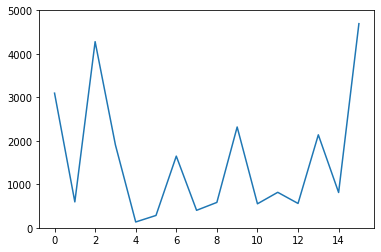

In [9]:
import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

x = np.array(range(len(runs_reaching_episode)))
y = np.array(steps_per_episode) / np.array(runs_reaching_episode)

print(y.tolist())
plt.plot(x.tolist(), y.tolist())
plt.ylim(0, 5000)

In [22]:
#1.5 and 1.6

# Load the maze
file = "../data/toy_maze.txt"
maze = Maze(file)

# Set the reward at the bottom right to 10
rewards = [(9, 9, 10)]

steps_per_episode = []
runs_reaching_episode = []

alfa = 0.7
gamma = 0.9
max_episodes = 40
max_iterations = 30000
eps = 0.1

for runNumber in range(3):
    res = main_algo(alfa=alfa, gamma=gamma, max_episodes=max_episodes, max_iter=max_iterations, eps=eps, maze=maze, rewards=rewards)
    print(res)

    for i in range(len(res)):
        if i >= len(runs_reaching_episode):
            runs_reaching_episode.append(0)
        if i >= len(steps_per_episode):
            steps_per_episode.append(0)
    
    for i in range(len(res)):
        steps_per_episode[i] += res[i]
        runs_reaching_episode[i] += 1

Ready reading maze file ../data/toy_maze.txt
Made EGreedy
1580
554
642
1780
292
496
338
732
160
138
292
90
216
170
376
180
54
66
92
92
70
60
32
34
24
28
26
26
28
32
28
28
26
30
26
40
26
26
26
[1580, 554, 642, 1780, 292, 496, 338, 732, 160, 138, 292, 90, 216, 170, 376, 180, 54, 66, 92, 92, 70, 60, 32, 34, 24, 28, 26, 26, 28, 32, 28, 28, 26, 30, 26, 40, 26, 26, 26, 30]
Made EGreedy
898
528
1692
950
382
780
204
834
414
366
694
292
464
118
380
78
292
166
200
258
52
94
60
38
48
30
26
26
28
26
26
30
26
26
50
26
26
26
36
[898, 528, 1692, 950, 382, 780, 204, 834, 414, 366, 694, 292, 464, 118, 380, 78, 292, 166, 200, 258, 52, 94, 60, 38, 48, 30, 26, 26, 28, 26, 26, 30, 26, 26, 50, 26, 26, 26, 36, 26]
Made EGreedy
990
1918
1572
1448
882
332
282
412
292
200
162
138
194
122
96
296
80
46
106
60
126
28
60
32
90
28
24
32
30
26
26
28
26
28
24
26
26
26
26
[990, 1918, 1572, 1448, 882, 332, 282, 412, 292, 200, 162, 138, 194, 122, 96, 296, 80, 46, 106, 60, 126, 28, 60, 32, 90, 28, 24, 32, 30, 26, 26, 28, 

[3468, 3000, 3906, 4178, 1556, 1608, 824, 1978, 866, 704, 1148, 520, 874, 410, 852, 554, 426, 278, 398, 410, 248, 182, 152, 104, 162, 86, 76, 84, 86, 84, 80, 86, 78, 84, 100, 92, 78, 78, 88, 86]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[1156.0, 1000.0, 1302.0, 1392.6666666666667, 518.6666666666666, 536.0, 274.6666666666667, 659.3333333333334, 288.6666666666667, 234.66666666666666, 382.6666666666667, 173.33333333333334, 291.3333333333333, 136.66666666666666, 284.0, 184.66666666666666, 142.0, 92.66666666666667, 132.66666666666666, 136.66666666666666, 82.66666666666667, 60.666666666666664, 50.666666666666664, 34.666666666666664, 54.0, 28.666666666666668, 25.333333333333332, 28.0, 28.666666666666668, 28.0, 26.666666666666668, 28.666666666666668, 26.0, 28.0, 33.333333333333336, 30.666666666666668, 26.0, 26.0, 29.333333333333332, 28.666666666666668]


(0.0, 2000.0)

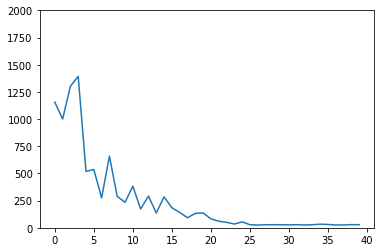

In [23]:
import matplotlib.pyplot as plt
import numpy as np

print(steps_per_episode)
print(runs_reaching_episode)

x = np.array(range(len(runs_reaching_episode)))
y = np.array(steps_per_episode) / np.array(runs_reaching_episode)

print(y.tolist())
plt.plot(x.tolist(), y.tolist())
plt.ylim(0, 2000)